<a href="https://colab.research.google.com/github/Eliandry/Neural-networks/blob/main/colorChange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Conv2D, UpSampling2D, InputLayer
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb
from skimage.io import imsave
import numpy as np
from google.colab import files
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [ ]:
upl=files.upload()
names=list(upl.keys())
images=[]
for i in range(len(names)):
  img = Image.open(BytesIO(upl[names[i]]))
  images.append(img)


Saving 782932.png to 782932.png


In [ ]:
def processed_image(img):
  image=img.resize((256,256),Image.BILINEAR)
  image = np.array(image, dtype=float)
  size = image.shape
  lab = rgb2lab(1.0/255*image)
  X, Y = lab[:,:,0], lab[:,:,1:]
  Y /= 128    # нормируем выходные значение в диапазон от -1 до 1
  X = X.reshape(1, size[0], size[1], 1)
  Y = Y.reshape(1, size[0], size[1], 2)
  return X, Y, size

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2)) #уменьшение в 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2))) #увелич в 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))

In [ ]:
model.compile(optimizer='adam',loss='mse')
for img in images:
  X,Y,size=processed_image(img)
  model.fit(x=X,y=Y,batch_size=len(images),epochs=45)

Epoch 1/45
1/1 [==============================] - 2s 2s/step - loss: 0.2588
Epoch 2/45
1/1 [==============================] - 1s 1s/step - loss: 0.9827
Epoch 3/45
1/1 [==============================] - 1s 1s/step - loss: 0.8119
Epoch 4/45
1/1 [==============================] - 1s 985ms/step - loss: 0.9935
Epoch 5/45
1/1 [==============================] - 1s 993ms/step - loss: 0.9925
Epoch 6/45
1/1 [==============================] - 1s 1s/step - loss: 0.9926
Epoch 7/45
1/1 [==============================] - 1s 992ms/step - loss: 0.9926
Epoch 8/45
1/1 [==============================] - 1s 990ms/step - loss: 0.9926
Epoch 9/45
1/1 [==============================] - 1s 995ms/step - loss: 0.9926
Epoch 10/45
1/1 [==============================] - 1s 987ms/step - loss: 0.9926
Epoch 11/45
1/1 [==============================] - 1s 985ms/step - loss: 0.9926
Epoch 12/45
1/1 [==============================] - 1s 988ms/step - loss: 0.9926
Epoch 13/45
1/1 [==============================] - 1s 989ms/s

In [ ]:
upl=files.upload()
names=list(upl.keys())
img = Image.open(BytesIO(upl[names[0]]))
X,Y,size=processed_image(img)

Saving 782932.png to 782932 (1).png


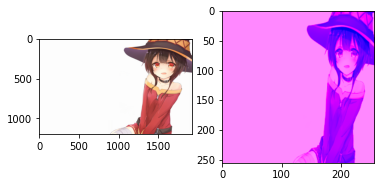

In [ ]:
output=model.predict(X)
output*=128
min_vals, max_vals = -128, 127
ab = np.clip(output[0], min_vals, max_vals)

cur = np.zeros((size[0], size[1], 3))
cur[:,:,0] = np.clip(X[0][:,:,0], 0, 100)
cur[:,:,1:] = ab
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(lab2rgb(cur))